In [22]:
cd /home/ubuntu/nbs/vidme

/home/ubuntu/nbs/vidme


In [4]:
import numpy as np
import gzip, pickle
from tsne import bh_sne #probelmatic with python 3
import glob
from sklearn.manifold import TSNE #try this as well... its faster than the other one
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from PIL import Image

In [23]:
f = gzip.open("mnist.pkl.gz", "rb")
train, val, test = pickle.load(f)
f.close()

In [24]:
X = np.asarray(np.vstack((train[0], val[0], test[0])), dtype=np.float64)
y = np.hstack((train[1], val[1], test[1]))

In [ ]:
#X_2d = bh_sne(X[:1000])

In [ ]:

X_2d = bh_sne(X)
rcParams['figure.figsize'] = 20, 20
scatter(X_2d[:, 0], X_2d[:, 1], c=y)

In [2]:


iris = load_iris()
X_tsne = TSNE(learning_rate=100).fit_transform(iris.data)
X_pca = PCA().fit_transform(iris.data)

In [28]:
X_tsne = TSNE(learning_rate=100).fit_transform(X[:1000])

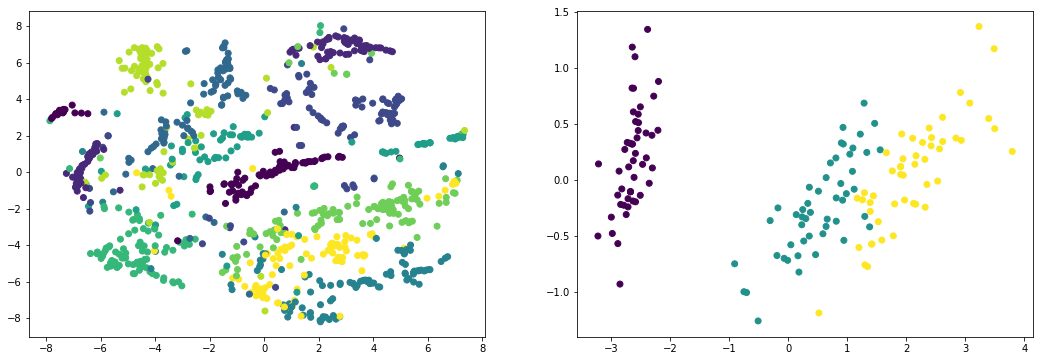

In [29]:
%matplotlib inline
fig = plt.figure( figsize=(18, 6))
plt.subplot(121)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y[:1000])
plt.subplot(122)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target)

## MNIST worked

In [32]:
from sklearn.datasets import fetch_mldata
#http://alexanderfabisch.github.io/t-sne-in-scikit-learn.html

# Load MNIST dataset
mnist = fetch_mldata("MNIST original")
X, y = mnist.data / 255.0, mnist.target

# Create subset and reduce to first 50 dimensions
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
n_train_samples = 5000
X_pca = PCA(n_components=50).fit_transform(X)
X_train = X_pca[indices[:n_train_samples]]
y_train = y[indices[:n_train_samples]]

In [89]:
X.shape[0]

70000

In [35]:
X_train_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_train)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 2.091325
[t-SNE] Iteration 25: error = 1.7702667, gradient norm = 0.0108479
[t-SNE] Iteration 50: error = 1.7024632, gradient norm = 0.0063890
[t-SNE] Iteration 75: error = 1.4620992, gradient norm = 0.0021486
[t-SNE] Iteration 100: error = 1.4135852, gradient norm = 0.0017789
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.413585
[t-SNE] Iteration 125: error = 1.3352743, gradient norm = 0.0013395
[t-SNE] Iteration 150: error = 1.3101567, gradient norm = 0.0012302
[t-SNE] Iteration 175: error = 1.3038527, gradient norm = 0.0011990
[t-SNE] 

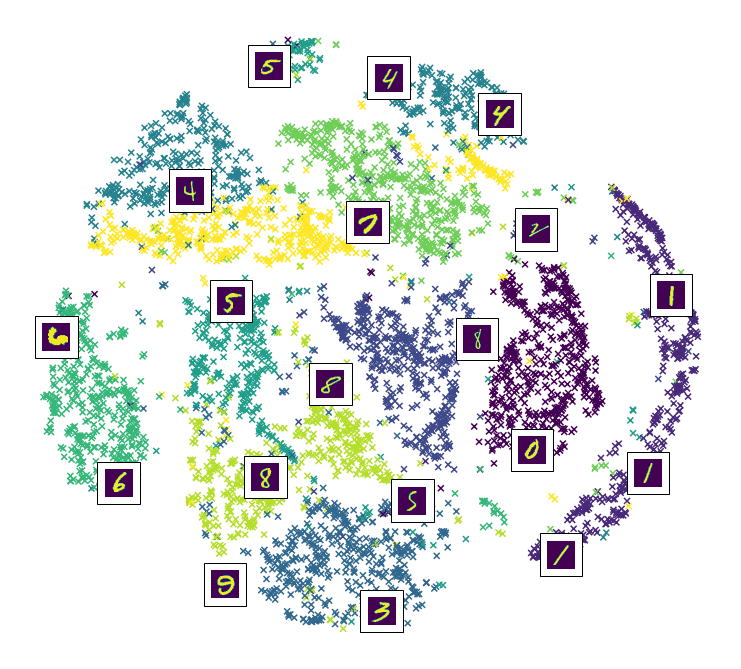

In [46]:
# Plotting function
plt.rc('font', **{'family' : 'sans-serif',
                         'weight' : 'bold',
                         'size'   : 18})
plt.rc('text', **{'usetex' : True})

def plot_mnist(X, y, X_embedded, name, min_dist=10.0):
    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes(frameon=False)
    #title("\\textbf{MNIST dataset} -- Two-dimensional "
    #     "embedding of 70,000 handwritten digits with %s" % name)
    plt.setp(ax, xticks=(), yticks=())
    plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                    wspace=0.0, hspace=0.0)
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1],
            c=y, marker="x")

    if min_dist is not None:
        from matplotlib import offsetbox
        shown_images = np.array([[15., 15.]])
        indices = np.arange(X_embedded.shape[0])
        np.random.shuffle(indices)
        for i in indices[:5000]:
            dist = np.sum((X_embedded[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist:
                continue
            shown_images = np.r_[shown_images, [X_embedded[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(X[i].reshape(28, 28)), X_embedded[i])
            ax.add_artist(imagebox)
            
plot_mnist(X[indices[:n_train_samples]], y_train, X_train_embedded,
           "t-SNE", min_dist=20.0)

## my pics :0

In [5]:
% cd /mnt/vidme/vid1/persons
person_files=glob.glob('*.png')
person_pics=np.random.choice(person_files,len(person_files),replace=False)

/mnt/vidme/vid1/persons


In [6]:
imgs=[]
for file in person_files:
    img=Image.open(file)
    img=img.resize([100,100])
    img=np.array(img)
    
    imgs.append(img)
person_img_array=np.array(imgs)

In [7]:
p_reshaped=person_img_array.reshape(1778,30000)

In [16]:
p_reshaped=p_reshaped/255.

In [21]:
#fast on 1778*30K
X_pca = PCA(n_components=50).fit_transform(p_reshaped)

In [24]:
X_train = X_pca[:1000]

In [25]:
X_train_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_train)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 8.782212
[t-SNE] Iteration 25: error = 1.1974057, gradient norm = 0.0088989
[t-SNE] Iteration 50: error = 1.1221333, gradient norm = 0.0111105
[t-SNE] Iteration 75: error = 0.8194141, gradient norm = 0.0037578
[t-SNE] Iteration 100: error = 0.7953411, gradient norm = 0.0050604
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.795341
[t-SNE] Iteration 125: error = 0.7388089, gradient norm = 0.0031040
[t-SNE] Iteration 150: error = 0.7286938, gradient norm = 0.0035570
[t-SNE] Iteration 175: error = 0.7297618, gradient norm = 0.0031729
[t-SNE] Iteration 200: error = 0.7270468, gradient norm = 0.0039353
[t-SNE] Iteration 225: error = 0.7289867, gradient norm = 0.0042421
[t-SNE] Iteration 250: error = 0.7335307, gradient norm = 0.0044720
[t-SNE] Iteration 250: did not make any progress during the last 30 

In [97]:
X_train_embedded[:,0]

array([  7.93829779e+01,   4.85684516e+01,  -3.30730079e+01,
        -9.76335236e+01,   5.82363517e+01,  -8.76097732e+01,
         2.08555584e+01,   5.90586555e+01,   9.95178039e+01,
        -1.30508049e+01,   2.55743317e+01,  -2.10621338e+01,
        -1.06155695e+01,   3.96411619e+01,  -2.94290955e+01,
         1.21223461e+01,   5.27177105e+01,   4.57015348e+01,
        -6.08858271e+00,  -6.28301699e+01,   3.51498984e+01,
        -8.13232625e+01,  -4.37199085e+01,  -1.14919150e+01,
         7.77148737e+01,   4.18046687e+01,   1.65461666e+01,
         5.14710089e+01,  -7.01494323e+01,  -1.51502591e+01,
        -2.26993286e+01,  -4.48427774e+01,   1.15005446e+01,
         9.07897166e+00,   1.60412305e+02,   4.50453209e+01,
         2.55182722e+01,  -5.67948933e+01,   6.58426299e+00,
         7.02706090e+01,  -7.74703331e+01,   4.01919843e+01,
         5.43487893e+01,   2.25198393e+01,  -7.55136121e+01,
         7.93037682e+01,  -3.01761858e+01,  -3.44330216e+01,
         3.50449553e+00,

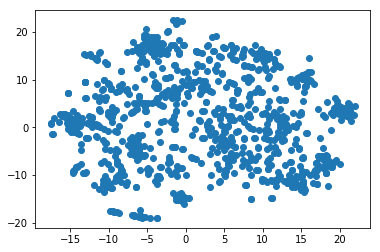

In [26]:
from matplotlib import pyplot as plt
% matplotlib inline
plt.scatter(X_train_embedded[:,0],X_train_embedded[:,1])